In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and understanding data

In [2]:
#reading and csv file as car_price
carPrice= pd.read_csv("Downloads/CarPrice_Assignment.csv",encoding = "ISO-8859-1")
carPrice.head(100)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [3]:
#checking the shape of the data frame
carPrice.shape

(205, 26)

In [4]:
carPrice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
#creating list for numrical and categorical variables according to data dictionary

cat_v=['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber','fuelsystem']
num_v=['wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [6]:
#getting an overall idea 
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#checking for null values
carPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# droping car_ID variable as it does not add value to our buisness model

carPrice=carPrice.drop("car_ID",axis=1)

In [9]:

# Keeping only Company Name

carPrice["CarName"]=carPrice["CarName"].apply(lambda x:x.split()[0])
carPrice["CarName"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
toyouta         1
mercury         1
vokswagen       1
Nissan          1
porcshce        1
Name: CarName, dtype: int64

In [10]:
# As we can see some brand name are misspelled, we have to treat them

carPrice["CarName"].replace(["maxda","vw","porcshce","vokswagen","Nissan","toyouta"],["mazda","volkswagen","porsche","volkswagen","nissan","toyota"],inplace=True)


In [12]:
# finding value counts for all categorical varibales

for i in cat_v:
    print(carPrice[i].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarName, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
do

### It is found that :

symboling, cylindernumber, 'doornumber' ----> Ordered categorical variable

'CarName', 'fueltype', 'aspiration',,
 'carbody', 'drivewheel', 'enginelocation','enginetype','fuelsystem' -----> Unordered catergorical data


# Data preparation

In [13]:
# importing labelEncoder for ordered categorical variables
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cyl=carPrice[["cylindernumber"]].apply(le.fit_transform)
print(cyl["cylindernumber"].value_counts())

2    159
3     24
1     11
0      5
6      4
5      1
4      1
Name: cylindernumber, dtype: int64


In [14]:
#if we compare the value counts of variable "cylindernumber " now, then it is shown that labelencoder did not encode perfectly
# for example, four = 159  >>>after encoding >>>> 2=159
#              five = 11 >>> after encoding >>> 1 = 11
#              two = 4 >>>> after encoding >>> 6 = 4
# as this is an ordered categorical value the order of after encoding does not decribe the data perfectly as four cylinder < less than six cylinder and so on

# so encoding manually ( label encoder encodes from 0 to n_classes-1)
carPrice[["cylindernumber"]]=carPrice[["cylindernumber"]].apply(lambda x: x.map({"two":0,"three":1,"four":2,"five":3,"six":4,"eight":5,"twelve":6}))


In [15]:
carPrice["cylindernumber"].value_counts()

2    159
4     24
3     11
5      5
0      4
6      1
1      1
Name: cylindernumber, dtype: int64

In [16]:
# Symboling variable data is already in an oredered manner from -2 to 3 . So no need to encode
# encoding others 

carPrice["fueltype"]=carPrice[["fueltype"]].apply(lambda x: x.map({"gas":1,"diesel":0}))
carPrice["aspiration"]=carPrice[["aspiration"]].apply(lambda x: x.map({"std":1,"turbo":0}))
carPrice["doornumber"]=carPrice[["doornumber"]].apply(lambda x: x.map({"four":1,"two":0}))
carPrice["enginelocation"]=carPrice[["enginelocation"]].apply(lambda x: x.map({"front":1,"rear":0}))

carPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
#creating dummy varible for variabe CarName

cname = pd.get_dummies(carPrice['CarName'], drop_first = True)
cname.shape

(205, 21)

In [18]:
#adding dummies to data frame carPrice dataframe

carPrice=pd.concat([carPrice,cname],axis=1)
carPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#droping the variable CarName as dummy variables are added


carPrice.drop("CarName",axis=1,inplace=True)


In [20]:
carPrice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#creating dummy variable for carbody

body=pd.get_dummies(carPrice["carbody"],drop_first=True)
body.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [22]:
#adding dummies to data frame 

carPrice= pd.concat([carPrice,body],axis=1)
carPrice.shape

(205, 49)

In [23]:
carPrice.drop("carbody",axis=1,inplace=True)

In [24]:
carPrice.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,3,1,1,0,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,rwd,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,fwd,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,1,4wd,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#creating dummies for the variable "drivewheel"
dw=pd.get_dummies(carPrice["drivewheel"],drop_first=True)
dw.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [26]:
carPrice=pd.concat([carPrice,dw],axis=1)
carPrice.shape

(205, 50)

In [27]:
carPrice.drop("drivewheel",axis=1,inplace=True)

In [28]:
carPrice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,1,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,0


In [29]:
#creating dummies for variable "enginetype"

etp = pd.get_dummies(carPrice["enginetype"],drop_first=True)
etp.head()


,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [30]:
carPrice=pd.concat([carPrice,etp],axis=1)
carPrice.shape

(205, 55)

In [31]:
carPrice.drop("enginetype",axis=1,inplace=True)

In [32]:
carPrice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0


In [33]:
# creating dummies for the variable "fuelsystem"
fs=pd.get_dummies(carPrice["fuelsystem"],drop_first=True)
fs.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [34]:
carPrice=pd.concat([carPrice,fs],axis=1)
carPrice.shape

(205, 61)

In [35]:
carPrice.drop("fuelsystem",axis=1,inplace=True)

In [36]:
carPrice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [37]:
carPrice.shape

(205, 60)

In [38]:
#Checking correlation between variables:

carPrice.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,0.194311,0.059866,-0.664073,-0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,...,0.037513,-0.013597,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
fueltype,0.194311,1.000000,0.401397,-0.191491,-0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,...,0.092384,0.085556,0.046383,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,0.059866,0.401397,1.000000,-0.031792,-0.057191,-0.257611,-0.234539,-0.300567,-0.087311,-0.324902,...,0.034450,0.070070,0.066203,0.323378,0.057191,-0.401397,-0.149190,0.050041,-0.394703,0.032857
doornumber,-0.664073,-0.191491,-0.031792,1.000000,0.137757,0.447357,0.398568,0.207168,0.552208,0.197379,...,0.022095,-0.052138,-0.159463,0.020525,-0.137757,0.191491,-0.079143,0.025019,-0.146272,-0.079143
enginelocation,-0.212471,-0.040070,-0.057191,0.137757,1.000000,0.187790,0.050989,0.051698,0.106234,-0.050468,...,-0.433727,0.031711,0.017192,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheelbase,-0.531954,-0.308346,-0.257611,0.447357,0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,...,-0.183195,0.166152,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,-0.212679,-0.234539,0.398568,0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,...,-0.118320,0.244053,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,-0.233880,-0.300567,0.207168,0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,...,-0.124446,0.348869,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,-0.284631,-0.087311,0.552208,0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,...,-0.046670,-0.065063,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,-0.217275,-0.324902,0.197379,-0.050468,0.776386,0.877728,0.867032,0.295572,1.000000,...,-0.080295,0.400878,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052


# Spliting data in to train and test data

In [39]:
# creating train and test dataframe by spliting with 70:30 

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test=train_test_split(carPrice,train_size=0.7,test_size=0.3,random_state=100)

In [40]:
print("training data shape ---->>",df_train.shape,"\n","Test data shape ---->>",df_test.shape)

training data shape ---->> (143, 60) 
 Test data shape ---->> (62, 60)


# Rescaling the features

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
# list of all numerical variable in the original data set
# "symboling" and "cylindernumber" are added for rescaling as these are ordered categorical variables

num_v=['symboling',"cylindernumber",'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [43]:
#instatiating
scaler= MinMaxScaler()

In [45]:
#applying scaler
df_train[num_v]=scaler.fit_transform(df_train[num_v])

In [46]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [47]:
df_train.shape

(143, 60)

In [48]:
# Getting an overall idea about the data distributtion 
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


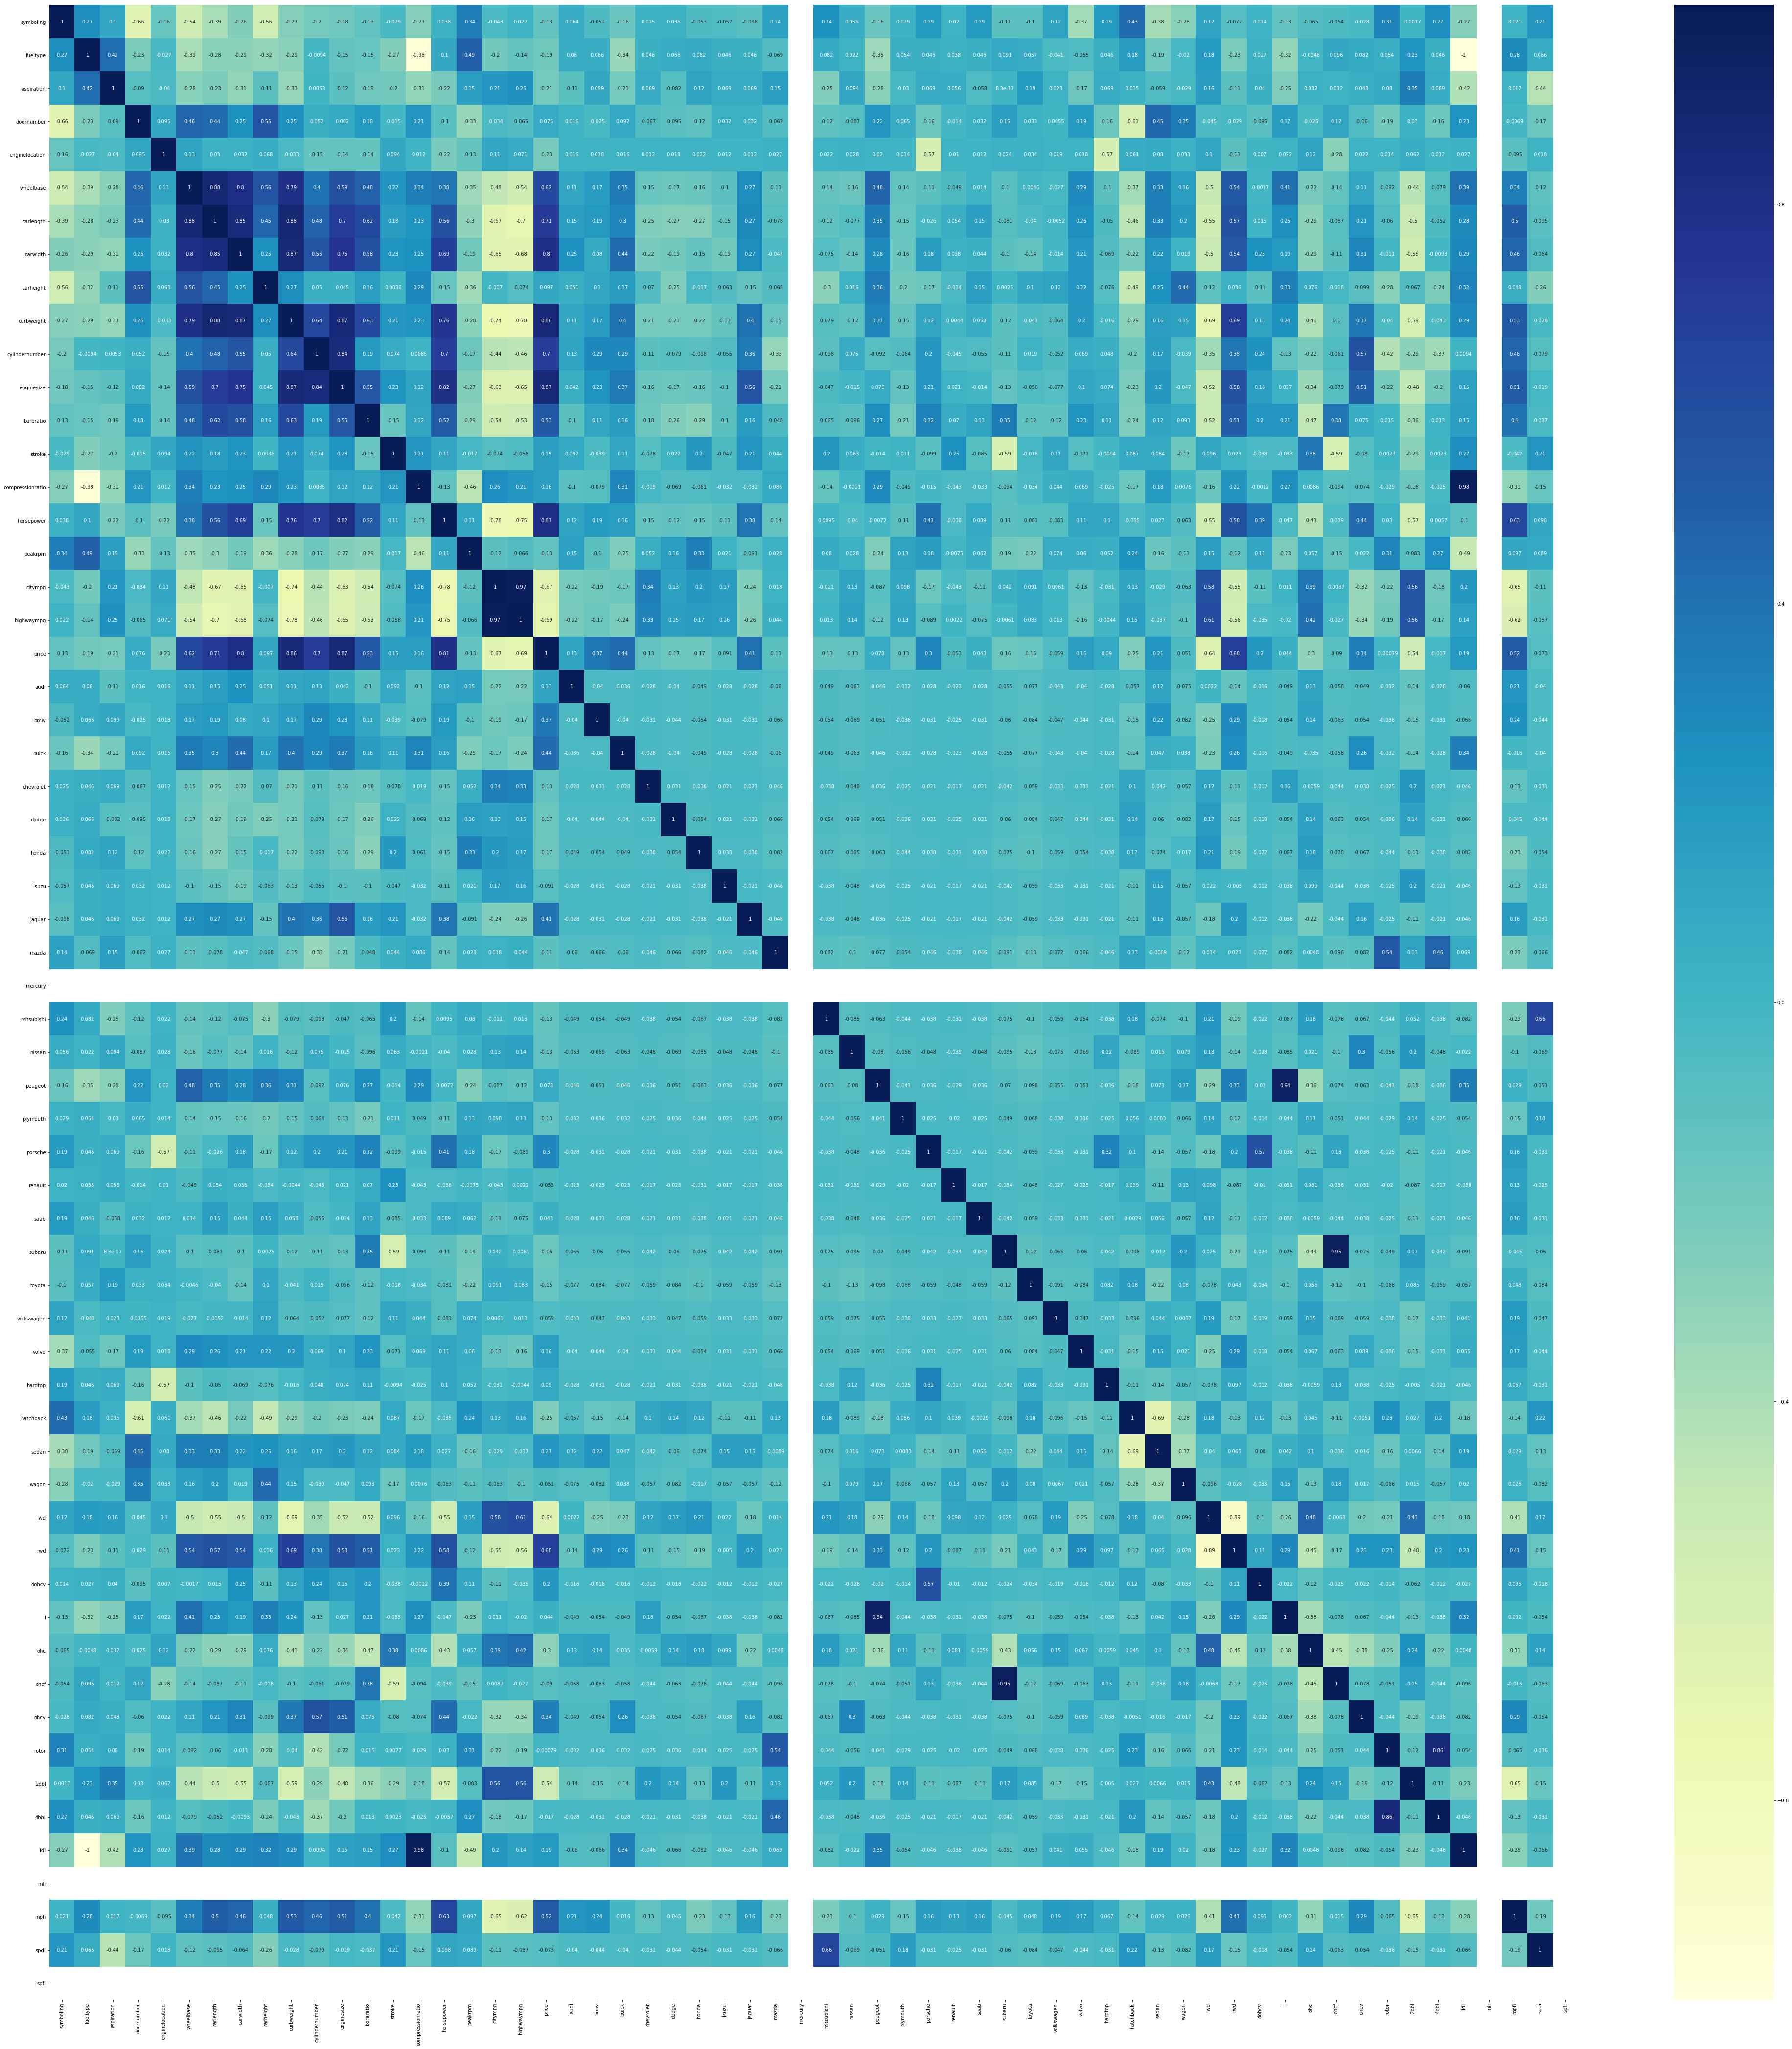

In [50]:
# checking corelation

plt.figure(figsize=(70,75))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [51]:
df_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [52]:
df_train.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,0.272756,1.023416e-01,-0.659214,-0.155104,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,...,-0.054312,-0.028385,0.313538,0.001721,0.270560,-0.272756,NaN,0.020993,0.211203,NaN
fueltype,0.272756,1.000000,4.185461e-01,-0.231626,-0.026537,-0.393481,-0.275886,-0.293054,-0.320231,-0.288561,...,0.095709,0.081954,0.053644,0.231869,0.046291,-1.000000,NaN,0.280624,0.066178,NaN
aspiration,0.102342,0.418546,1.000000e+00,-0.089642,-0.039559,-0.277414,-0.234925,-0.307027,-0.111052,-0.325634,...,0.011890,0.047510,0.079968,0.345651,0.069007,-0.418546,NaN,0.016600,-0.443937,NaN
doornumber,-0.659214,-0.231626,-8.964215e-02,1.000000,0.094565,0.462232,0.436645,0.245854,0.554436,0.251023,...,0.116173,-0.060031,-0.191160,0.030365,-0.164957,0.231626,NaN,-0.006944,-0.165569,NaN
enginelocation,-0.155104,-0.026537,-3.955939e-02,0.094565,1.000000,0.127454,0.030193,0.031943,0.067534,-0.033473,...,-0.277269,0.021748,0.014236,0.061532,0.012284,0.026537,NaN,-0.094565,0.017562,NaN
wheelbase,-0.539877,-0.393481,-2.774139e-01,0.462232,0.127454,1.000000,0.877909,0.796888,0.555524,0.792815,...,-0.135755,0.108535,-0.092032,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN
carlength,-0.390880,-0.275886,-2.349248e-01,0.436645,0.030193,0.877909,1.000000,0.846307,0.454721,0.881495,...,-0.086593,0.211595,-0.059682,-0.502693,-0.051502,0.275886,NaN,0.501706,-0.094743,NaN
carwidth,-0.263917,-0.293054,-3.070265e-01,0.245854,0.031943,0.796888,0.846307,1.000000,0.245022,0.873884,...,-0.108346,0.305924,-0.010753,-0.551596,-0.009279,0.293054,NaN,0.460851,-0.063850,NaN
carheight,-0.557179,-0.320231,-1.110516e-01,0.554436,0.067534,0.555524,0.454721,0.245022,1.000000,0.272388,...,-0.017898,-0.099329,-0.276412,-0.067042,-0.238523,0.320231,NaN,0.047857,-0.263335,NaN
curbweight,-0.268481,-0.288561,-3.256339e-01,0.251023,-0.033473,0.792815,0.881495,0.873884,0.272388,1.000000,...,-0.100522,0.370775,-0.040089,-0.593771,-0.042573,0.288561,NaN,0.526508,-0.027766,NaN


In [53]:
# checking corealtion between the target variable (dependent) and all other independent variables

df_train[df_train.columns[:]].corr()["price"][:]

symboling          -0.129859
fueltype           -0.191150
aspiration         -0.206540
doornumber          0.075936
enginelocation     -0.226217
wheelbase           0.622591
carlength           0.713749
carwidth            0.799380
carheight           0.096631
curbweight          0.861860
cylindernumber      0.702341
enginesize          0.867915
boreratio           0.533591
stroke              0.152820
compressionratio    0.160847
horsepower          0.806183
peakrpm            -0.127431
citympg            -0.674290
highwaympg         -0.688389
price               1.000000
audi                0.131449
bmw                 0.371790
buick               0.437268
chevrolet          -0.132643
dodge              -0.165673
honda              -0.172485
isuzu              -0.091266
jaguar              0.405372
mazda              -0.105680
mercury                  NaN
mitsubishi         -0.134087
nissan             -0.126440
peugeot             0.077676
plymouth           -0.129405
porsche       

In [54]:
#these variables are to be removed based on their corelation to the dependent variable

toremove=["mfi","spfi","mercury","doornumber","4bbl","rotor","l","wagon","volkswagen","saab","renault","spdi","ohcf","hardtop","peugeot"]


In [55]:
# removing variables 

df_train.drop(toremove,axis=1,inplace=True)

In [56]:
df_train.shape

(143, 45)

In [57]:
(df_train.corr())

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,hatchback,sedan,fwd,rwd,dohcv,ohc,ohcv,2bbl,idi,mpfi
symboling,1.000000,0.272756,1.023416e-01,-0.155104,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.203482,...,0.431934,-0.378439,0.122342,-0.072106,0.014279,-0.064765,-0.028385,0.001721,-0.272756,0.020993
fueltype,0.272756,1.000000,4.185461e-01,-0.026537,-0.393481,-0.275886,-0.293054,-0.320231,-0.288561,-0.009393,...,0.177060,-0.185979,0.184655,-0.227232,0.026537,-0.004762,0.081954,0.231869,-1.000000,0.280624
aspiration,0.102342,0.418546,1.000000e+00,-0.039559,-0.277414,-0.234925,-0.307027,-0.111052,-0.325634,0.005251,...,0.034730,-0.059409,0.164489,-0.110608,0.039559,0.031944,0.047510,0.345651,-0.418546,0.016600
enginelocation,-0.155104,-0.026537,-3.955939e-02,1.000000,0.127454,0.030193,0.031943,0.067534,-0.033473,-0.146446,...,0.060588,0.079906,0.101590,-0.114449,0.007042,0.123840,0.021748,0.061532,0.026537,-0.094565
wheelbase,-0.539877,-0.393481,-2.774139e-01,0.127454,1.000000,0.877909,0.796888,0.555524,0.792815,0.397517,...,-0.371606,0.333352,-0.499023,0.538721,-0.001739,-0.222195,0.108535,-0.438523,0.393481,0.338923
carlength,-0.390880,-0.275886,-2.349248e-01,0.030193,0.877909,1.000000,0.846307,0.454721,0.881495,0.479100,...,-0.456829,0.333683,-0.549343,0.567900,0.015262,-0.293690,0.211595,-0.502693,0.275886,0.501706
carwidth,-0.263917,-0.293054,-3.070265e-01,0.031943,0.796888,0.846307,1.000000,0.245022,0.873884,0.554537,...,-0.224067,0.222689,-0.500816,0.539726,0.245699,-0.290778,0.305924,-0.551596,0.293054,0.460851
carheight,-0.557179,-0.320231,-1.110516e-01,0.067534,0.555524,0.454721,0.245022,1.000000,0.272388,0.050402,...,-0.489903,0.247586,-0.119790,0.035752,-0.105596,0.075929,-0.099329,-0.067042,0.320231,0.047857
curbweight,-0.268481,-0.288561,-3.256339e-01,-0.033473,0.792815,0.881495,0.873884,0.272388,1.000000,0.635077,...,-0.294072,0.162677,-0.691805,0.687311,0.127791,-0.412737,0.370775,-0.593771,0.288561,0.526508
cylindernumber,-0.203482,-0.009393,5.250954e-03,-0.146446,0.397517,0.479100,0.554537,0.050402,0.635077,1.000000,...,-0.195203,0.174694,-0.352611,0.376357,0.235560,-0.223088,0.574576,-0.293267,0.009393,0.456690


In [58]:
df_train[df_train.columns[:]].corr()["price"][:]

symboling          -0.129859
fueltype           -0.191150
aspiration         -0.206540
enginelocation     -0.226217
wheelbase           0.622591
carlength           0.713749
carwidth            0.799380
carheight           0.096631
curbweight          0.861860
cylindernumber      0.702341
enginesize          0.867915
boreratio           0.533591
stroke              0.152820
compressionratio    0.160847
horsepower          0.806183
peakrpm            -0.127431
citympg            -0.674290
highwaympg         -0.688389
price               1.000000
audi                0.131449
bmw                 0.371790
buick               0.437268
chevrolet          -0.132643
dodge              -0.165673
honda              -0.172485
isuzu              -0.091266
jaguar              0.405372
mazda              -0.105680
mitsubishi         -0.134087
nissan             -0.126440
plymouth           -0.129405
porsche             0.302801
subaru             -0.164373
toyota             -0.148968
volvo         

# Building model

In [59]:
y_train=df_train.pop("price")
X_train = df_train

In [60]:
X_train.shape

(143, 44)

In [61]:
# model -1

import statsmodels.api as sm
#adding constant

X_train_lm=sm.add_constant(X_train)

#crating the linear regression model

lr_1 = sm.OLS(y_train, X_train_lm).fit()



In [62]:
# Checking the summary for coefficietnts, R-squared value, p-value, Adj. R-squared ,etc
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     54.02
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.02e-52
Time:                        17:56:36   Log-Likelihood:                 245.55
No. Observations:                 143   AIC:                            -403.1
Df Residuals:                      99   BIC:                            -272.7
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3663      0.109  

In [63]:
#Estimating Varience Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,789.84
42,idi,252.63
10,enginesize,143.05
13,compressionratio,116.56
16,citympg,49.07
17,highwaympg,43.77
9,cylindernumber,41.87
8,curbweight,41.31
14,horsepower,37.62
11,boreratio,26.84


In [65]:
# removing variables with high p-value as this makes them insignificant

drpc=["sedan","fwd","fueltype","carlength","horsepower","citympg","audi","chevrolet","isuzu","jaguar","mazda","nissan","toyota","ohc","mpfi"]

In [66]:
x=X_train.drop(drpc,axis=1)

In [67]:
# model=2

X_train_lm = sm.add_constant(x)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     88.20
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.35e-64
Time:                        17:59:02   Log-Likelihood:                 243.09
No. Observations:                 143   AIC:                            -426.2
Df Residuals:                     113   BIC:                            -337.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4680      0.107  

In [69]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginelocation,179.92
11,compressionratio,147.97
28,idi,112.65
6,curbweight,104.62
8,enginesize,104.15
7,cylindernumber,92.08
4,carwidth,70.93
9,boreratio,58.85
3,wheelbase,52.13
10,stroke,38.29


In [70]:
# removing variables with high p-value as this makes them insignificant.

drp2=["2bbl","ohcv","rwd","highwaympg","wheelbase"]

In [71]:
x2=x.drop(drp2,axis=1)

In [72]:
# model=3

X_train_lm = sm.add_constant(x2)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     102.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.50e-67
Time:                        18:00:16   Log-Likelihood:                 237.22
No. Observations:                 143   AIC:                            -424.4
Df Residuals:                     118   BIC:                            -350.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5293      0.101  

In [74]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginelocation,140.06
10,compressionratio,134.55
23,idi,105.14
7,enginesize,100.65
6,cylindernumber,86.66
5,curbweight,58.24
8,boreratio,56.64
3,carwidth,40.08
9,stroke,32.66
4,carheight,19.59


In [75]:
# removing variables with high p-value as this makes them insignificant

drp3=["compressionratio","idi","aspiration","symboling"]

In [76]:
x3=x2.drop(drp3,axis=1)

In [77]:
# model=4

X_train_lm = sm.add_constant(x3)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.04e-68
Time:                        18:02:11   Log-Likelihood:                 227.80
No. Observations:                 143   AIC:                            -413.6
Df Residuals:                     122   BIC:                            -351.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4803      0.096      4.

In [79]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,93.44
5,enginesize,91.80
4,cylindernumber,84.52
6,boreratio,52.71
3,curbweight,48.93
1,carwidth,39.33
7,stroke,28.25
2,carheight,17.42
8,peakrpm,8.49
16,subaru,3.18


In [80]:
# removing variables with high p-value as this makes them insignificant
# removiing variable "enginelocation" for high VIF 
drp4=["stroke","hatchback","enginelocation"]

In [81]:
x4=x3.drop(drp4,axis=1)

In [82]:
# model=5

X_train_lm = sm.add_constant(x4)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [83]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     109.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.14e-66
Time:                        18:03:45   Log-Likelihood:                 214.50
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     125   BIC:                            -339.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0637      0.044      1.

In [84]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,61.94
2,curbweight,47.26
3,cylindernumber,44.31
0,carwidth,36.27
5,boreratio,26.38
1,carheight,13.65
6,peakrpm,7.85
14,subaru,2.25
13,porsche,1.89
16,dohcv,1.69


In [85]:
#dohcv= for high p-value, cylindernumber for high VIF , carheight for high VIF (also it was observed that by removing the enginesize there is a drastic change in R-squared value, reduced)
# (from the earlier coorelation check, correlation between price and carheight is 0.09 , price & enginesize is 0.86), hence carheight is choosen

drp5=["dohcv","cylindernumber","carheight"]

In [86]:
x5=x4.drop(drp5,axis=1)

In [87]:
# model=6

X_train_lm = sm.add_constant(x5)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.19e-62
Time:                        18:13:31   Log-Likelihood:                 195.46
No. Observations:                 143   AIC:                            -360.9
Df Residuals:                     128   BIC:                            -316.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1532      0.026     -5.875      0.0

In [88]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.51
0,carwidth,31.36
3,boreratio,17.20
2,enginesize,15.60
4,peakrpm,5.33
12,subaru,1.76
6,buick,1.41
8,honda,1.38
11,porsche,1.26
5,bmw,1.17


In [89]:
# removing variables with high p-value as this makes them insignificant

drp6=["subaru","plymouth","dodge","volvo"]

In [90]:

x6=x5.drop(drp6,axis=1)

In [91]:
#model =7
X_train_lm = sm.add_constant(x6)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.98e-65
Time:                        18:14:14   Log-Likelihood:                 192.08
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     132   BIC:                            -329.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1754      0.025     -7.104      0.0

In [92]:
vif = pd.DataFrame()
vif['Features'] = x6.columns
vif['VIF'] = [variance_inflation_factor(x6.values, i) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.27
0,carwidth,31.26
2,enginesize,15.40
3,boreratio,10.53
4,peakrpm,4.30
6,buick,1.39
7,honda,1.30
9,porsche,1.19
5,bmw,1.15
8,mitsubishi,1.10


In [93]:
#boreratio & honda --- for high p-value
# curbweight ---- for high VIF
drp7=["boreratio","curbweight","honda"]

In [94]:
x7=x6.drop(drp7,axis=1)

In [95]:
#model =8
X_train_lm = sm.add_constant(x7)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.85e-62
Time:                        18:15:09   Log-Likelihood:                 176.71
No. Observations:                 143   AIC:                            -337.4
Df Residuals:                     135   BIC:                            -313.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1941      0.024     -8.242      0.0

In [96]:
vif = pd.DataFrame()
vif['Features'] = x7.columns
vif['VIF'] = [variance_inflation_factor(x7.values, i) for i in range(x7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,13.17
1,enginesize,9.20
2,peakrpm,3.57
4,buick,1.32
3,bmw,1.15
6,porsche,1.09
5,mitsubishi,1.08


In [97]:
# carwidth --- for high VIF
drp8=["carwidth"]

In [98]:
x8=x7.drop(drp8,axis=1)

In [99]:
#model =9
X_train_lm = sm.add_constant(x8)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.22e-54
Time:                        18:15:38   Log-Likelihood:                 154.32
No. Observations:                 143   AIC:                            -294.6
Df Residuals:                     136   BIC:                            -273.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1041      0.023     -4.517      0.0

In [100]:
vif = pd.DataFrame()
vif['Features'] = x8.columns
vif['VIF'] = [variance_inflation_factor(x8.values, i) for i in range(x8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.69
1,peakrpm,2.18
3,buick,1.27
2,bmw,1.14
4,mitsubishi,1.08
5,porsche,1.08


# As all VIF values are below 5 and all p-values are below 0.05 for this model, it is taken as the final model

# Residual analysis

In [101]:
#predicting

y_train_price=lr_9.predict(X_train_lm)


Text(0.5, 0, 'Errors')

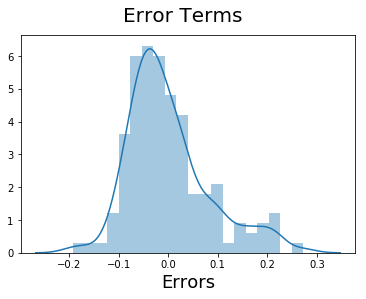

In [102]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

In [ ]:
# Error terms are normally distributed

# Making predition using the final model (model-9)

In [103]:
#Scalling the test dataframe by using the scaler which is developed from the train dataframe

num_v=['symboling',"cylindernumber",'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_v] = scaler.transform(df_test[num_v])

In [104]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,0.4,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,...,0,0,0,1,0,0,0,0,0,0
186,0.8,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,...,0,0,0,0,0,0,0,1,0,0
59,0.6,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,...,0,0,0,1,0,0,0,0,0,0
165,0.6,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,...,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,...,1,0,0,1,0,0,0,0,0,0


In [105]:
#dropping all variables which were dropped during model building process 

dallv=toremove+drpc+drp2+drp3+drp4+drp5+drp6+drp7+drp8
len(dallv)

53

In [106]:
df_test.drop(dallv,axis=1,inplace=True)

In [107]:
df_test.shape

(62, 7)

In [108]:
# creating test data sets

y_test = df_test.pop('price')
X_test = df_test

In [109]:
# adding constant
X_test_m = sm.add_constant(X_test)


In [110]:
# Making predictions using the final model(model-9)

y_pred_m = lr_9.predict(X_test_m)

In [135]:
# estimating the r2_score of the test data

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m)

0.8799158160567763

#### R2_score for training data =0.854 
#### R2_score for training data =0.879
#### As the difference is very less, this is a pretty good linear regression model



Text(0, 0.5, 'y_pred')

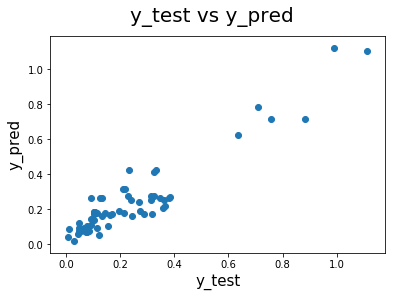

In [136]:
#To get an idea about the spread of data between y_test vs _pred
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_pred', fontsize = 15)  

In [132]:

lr_9.params


const        -0.104143
enginesize    1.036849
peakrpm       0.137744
bmw           0.238413
buick         0.239786
mitsubishi   -0.072435
porsche       0.203914
dtype: float64

###  the final linear regression model is 

#### price=1.036 x enginesize +0.137 x peakrpm + 0.238 x bmw + 0.239 x buick - 0.072 x mitsubishi + 0.203 x porsche - 0.104

Interpretaion :
for 1 unit increace in enginesize ----- > 1.036 increase in price (keeping all other variable constant)
for 1 unit increace in peakrmp    ----- > 0.137 increase in price    (keeping all other variable constant)
for 1 unit increace in bmw ------------ > 0.238 increase in price  (keeping all other variable constant)
for 1 unit increace in buick ---------- > 0.239 increase in price (keeping all other variable constant)
for 1 unit increace in mitsubishi ----- > 0.072 decrease in price (keeping all other variable constant)
for 1 unit increace in porsche  ------- > 0.203 increase in price (keeping all other variable constant)